In [1]:
import heartpy as hp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = 'ppg_calm.csv'

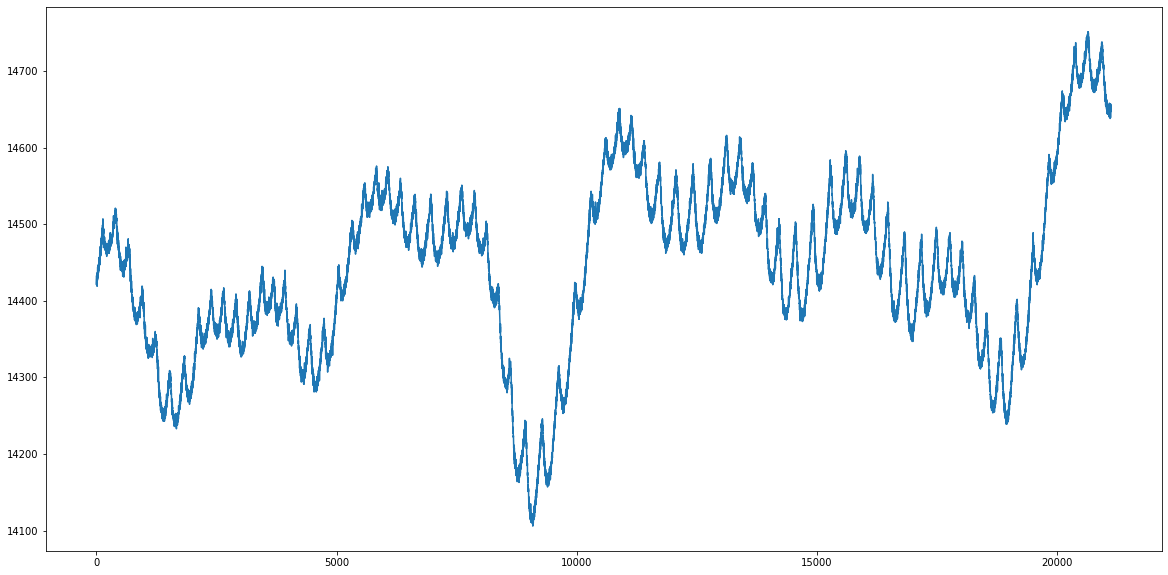

In [3]:
# load the PPG signal (fs = 400Hz)
data = hp.get_data(file)
time = data[1:][:, 0]
fs = 1/time[0]
ppg = data[1:][:, 1]

# and visualise
plt.figure(figsize=(20,10))
plt.plot(ppg)
plt.show()

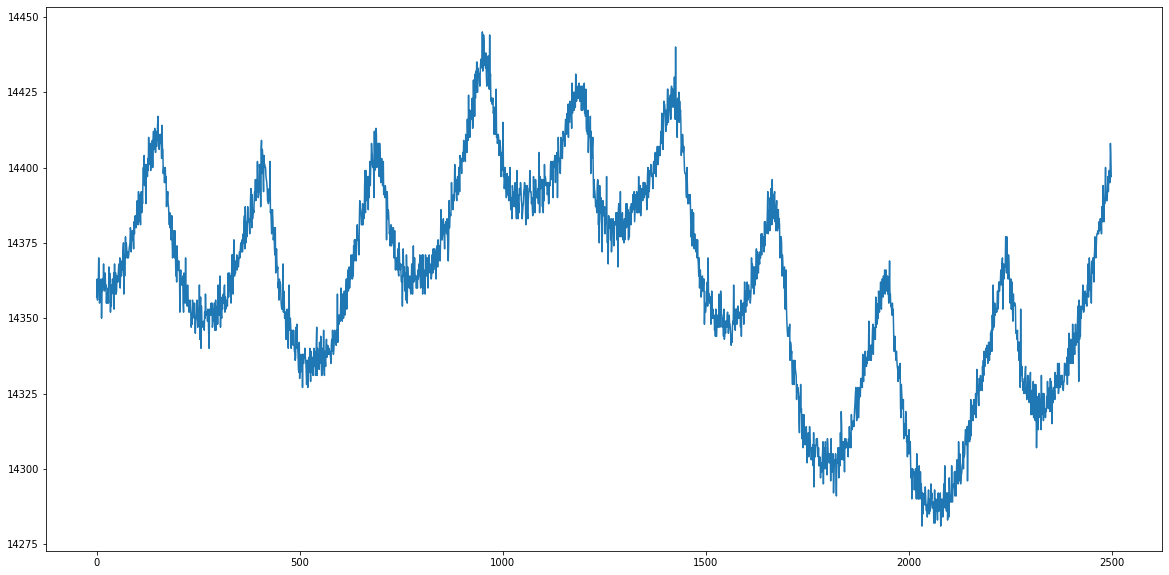

In [4]:
# zoom in
plt.figure(figsize=(20,10))
plt.plot(ppg[2500:5000])
plt.show()

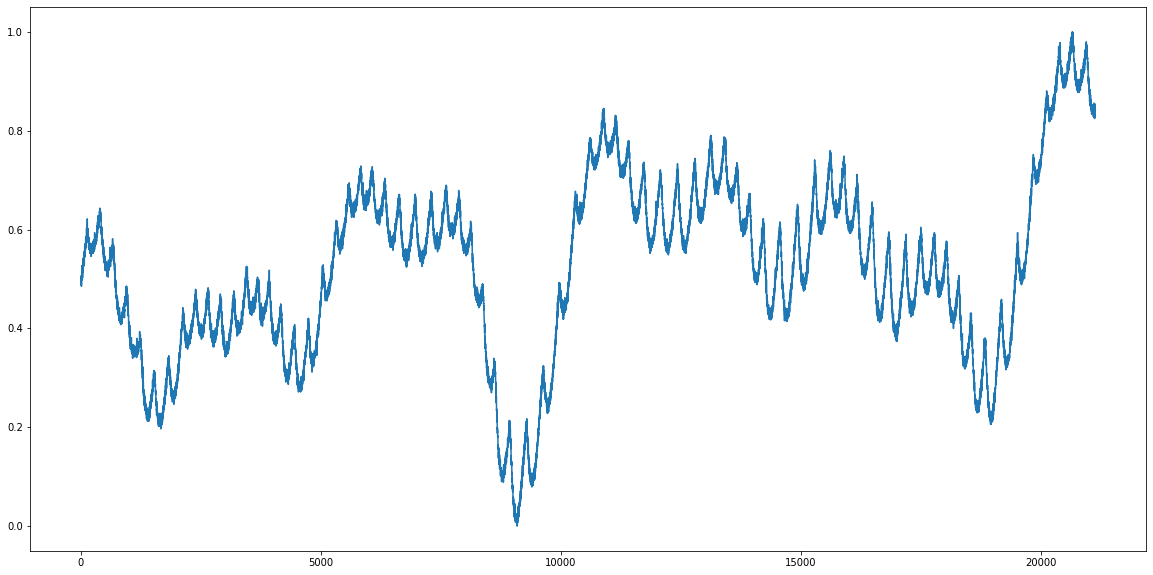

In [5]:
# scale
scaled = hp.scale_data(ppg, lower=0, upper=1)
plt.figure(figsize=(20,10))
plt.plot(scaled)
plt.show()

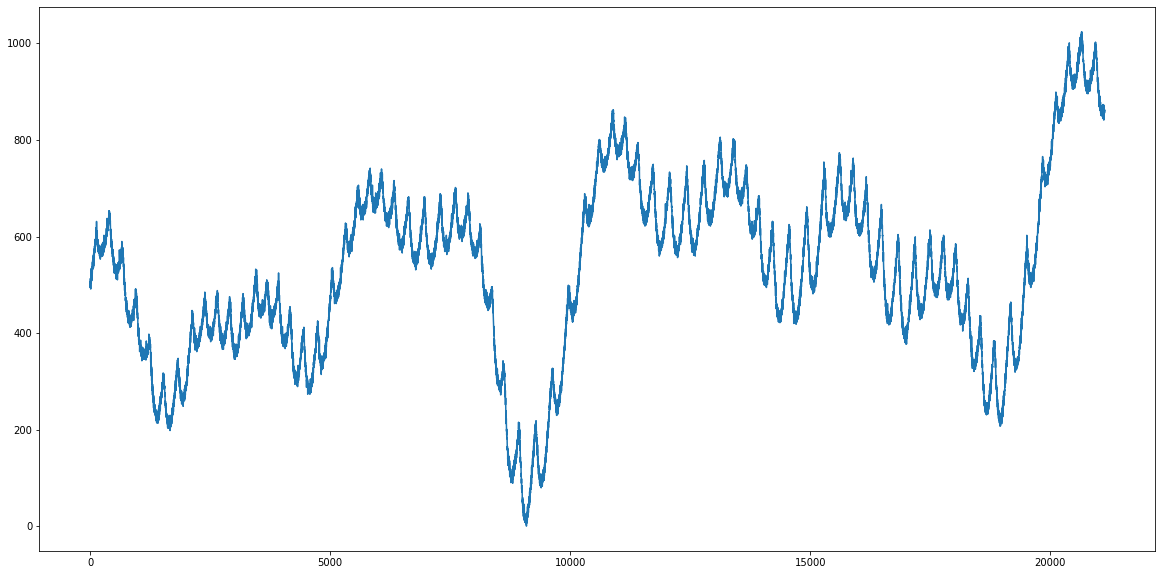

In [6]:
# enhance peaks (optional; might affect performance)
enhanced = hp.enhance_peaks(ppg, iterations=1)
plt.figure(figsize=(20,10))
plt.plot(enhanced)
plt.show()

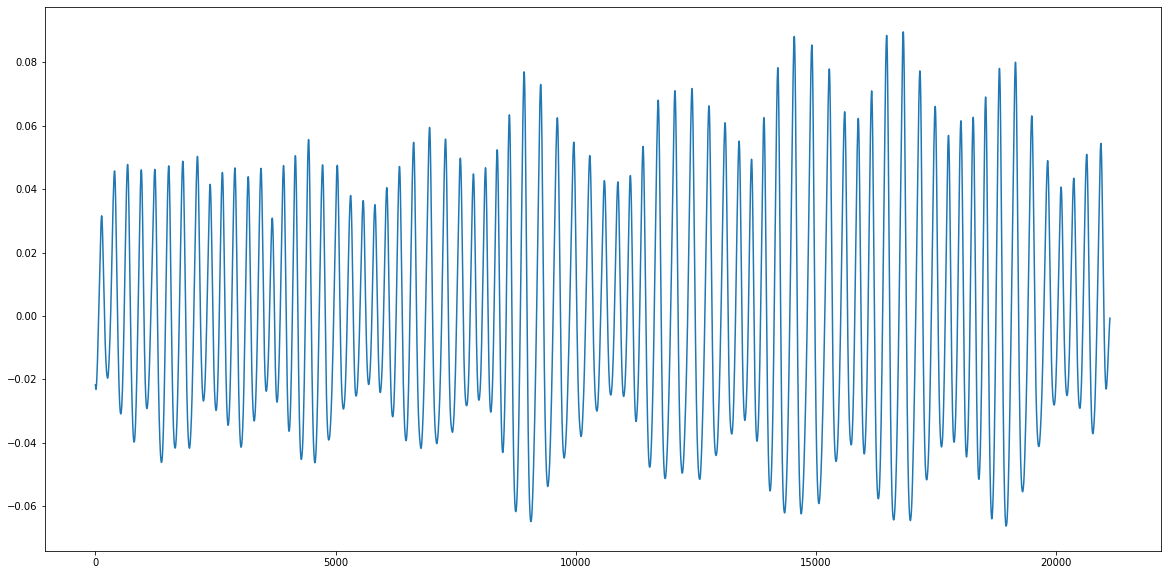

In [7]:
# filter
filtered = hp.filter_signal(scaled, cutoff=[0.75, 3], sample_rate=fs, order=1, filtertype='bandpass')
plt.figure(figsize=(20,10))
plt.plot(filtered)
plt.show()

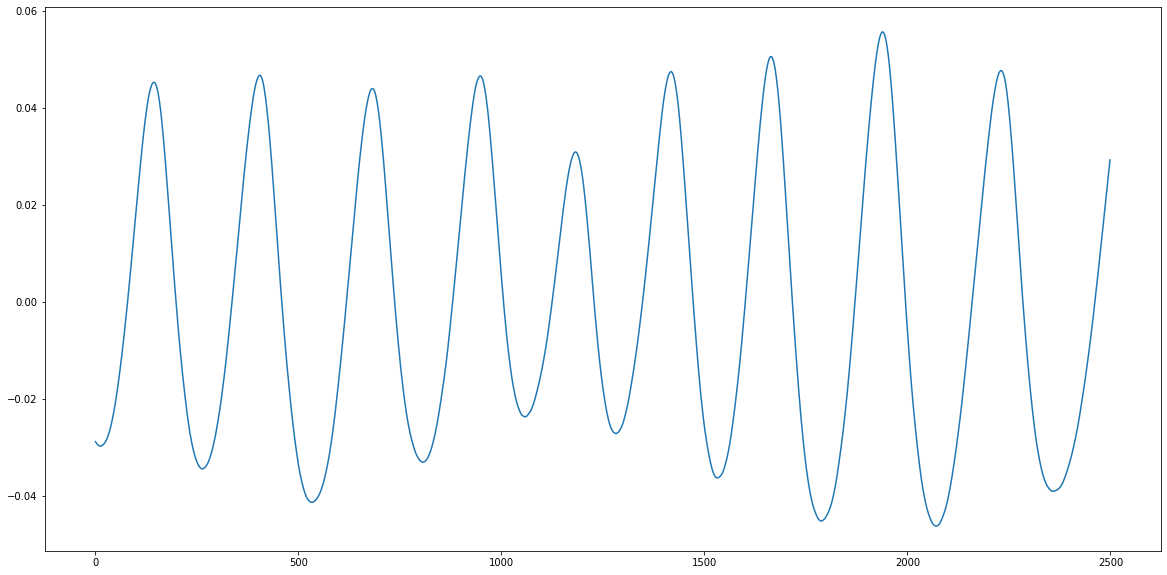

In [8]:
plt.figure(figsize=(20,10))
plt.plot(filtered[2500:5000])
plt.show()

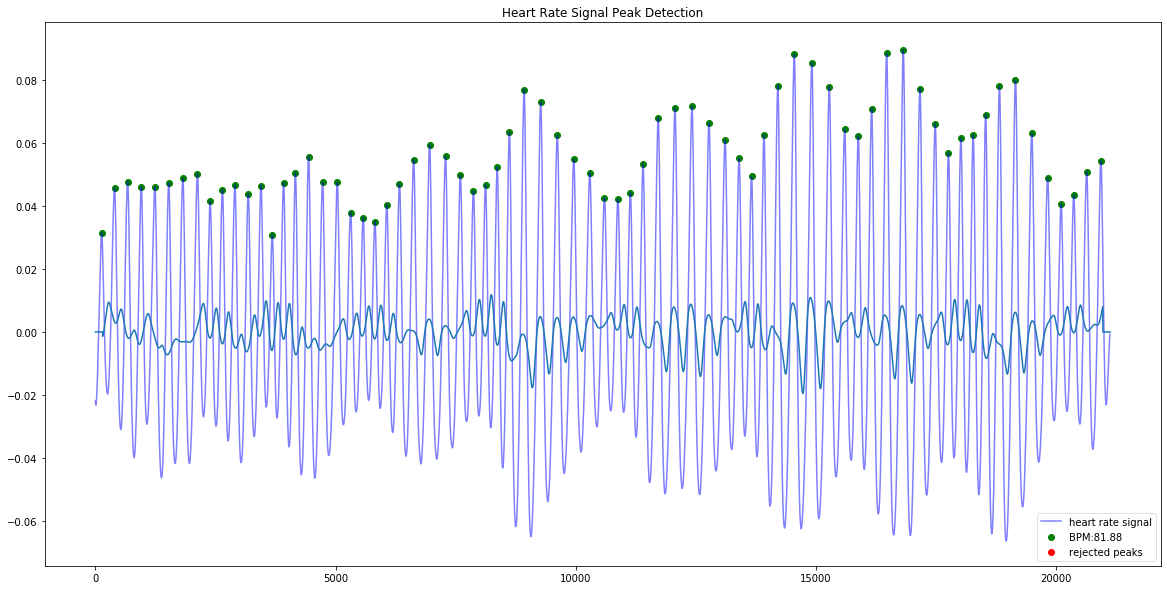

bpm: 81.879775
ibi: 732.781690
sdnn: 88.774312
sdsd: 62.546297
rmssd: 62.554177
pnn20: 0.328571
pnn50: 0.214286
hr_mad: 66.000000
breathingrate: 0.170374
lf: 370.493332
hf: 866.716750
lf/hf: 0.427468


In [9]:
# compute HRV
wd, m = hp.process(filtered, sample_rate=fs, calc_freq=True, freq_method='fft', high_precision=True, clean_rr=True)

# plot
plt.figure(figsize=(20,10))
hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

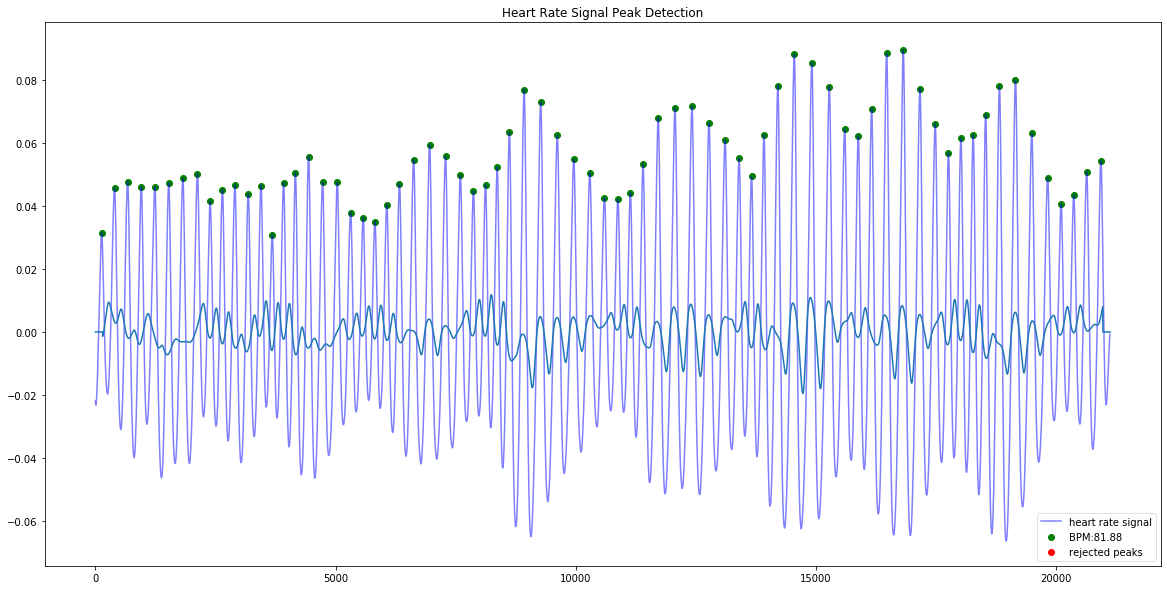

bpm: 81.879775
ibi: 732.781690
sdnn: 88.774312
sdsd: 62.546297
rmssd: 62.554177
pnn20: 0.328571
pnn50: 0.214286
hr_mad: 66.000000
breathingrate: 0.170374
lf: 370.493332
hf: 866.716750
lf/hf: 0.427468


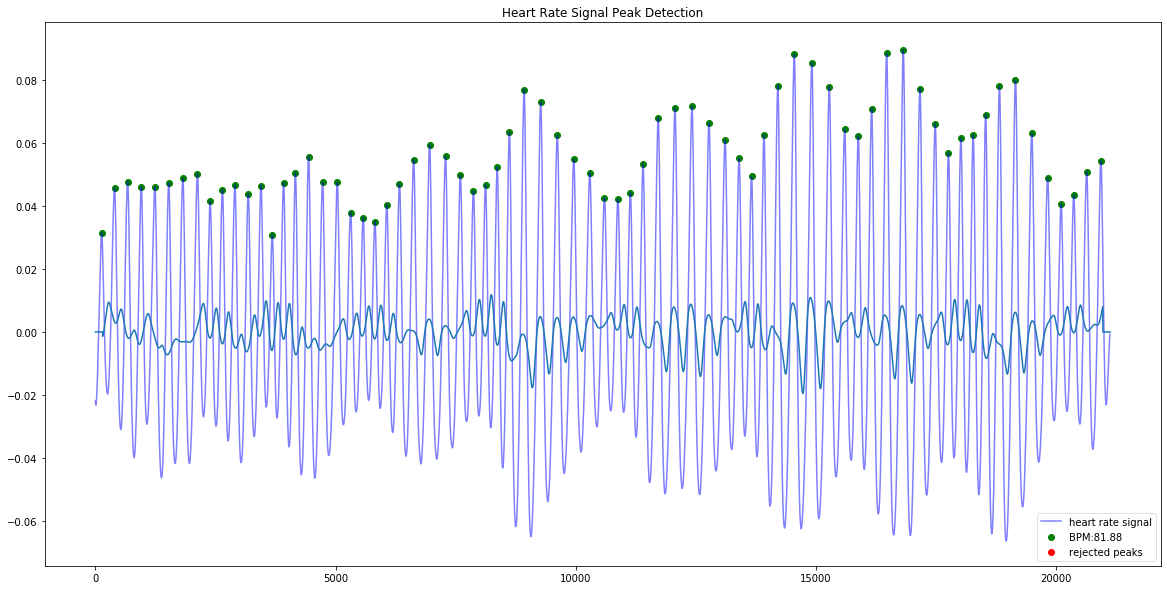

bpm: 81.879775
ibi: 732.781690
sdnn: 88.774312
sdsd: 62.546297
rmssd: 62.554177
pnn20: 0.328571
pnn50: 0.214286
hr_mad: 66.000000
breathingrate: 0.170374
lf: 370.493332
hf: 866.716750
lf/hf: 0.427468


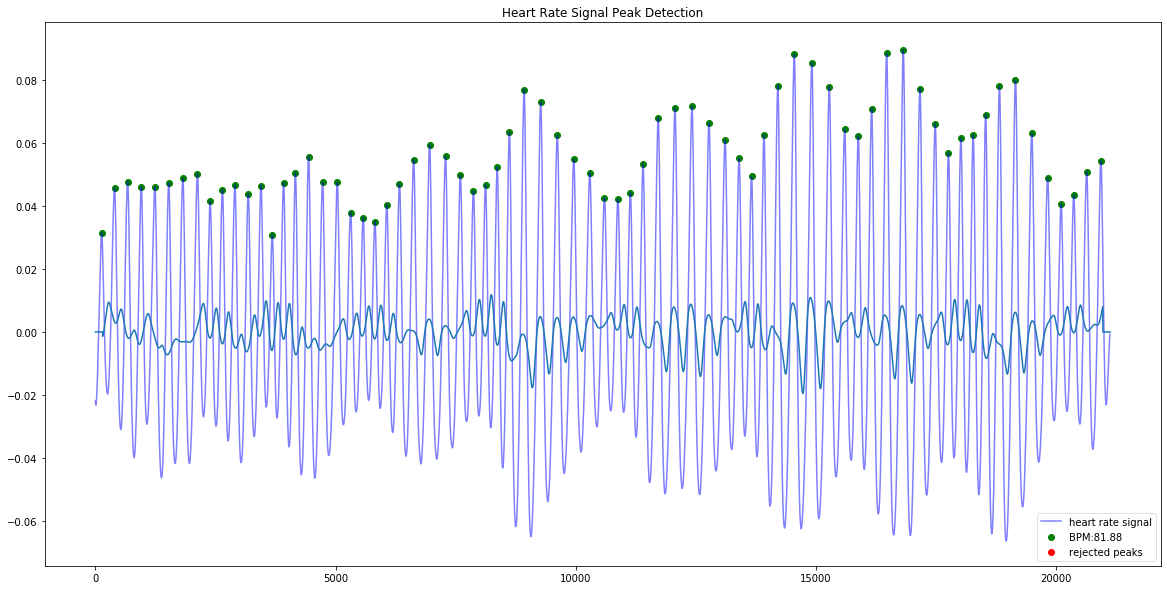

bpm: 81.879775
ibi: 732.781690
sdnn: 88.774312
sdsd: 62.546297
rmssd: 62.554177
pnn20: 0.328571
pnn50: 0.214286
hr_mad: 66.000000
breathingrate: 0.170374
lf: 370.493332
hf: 866.716750
lf/hf: 0.427468


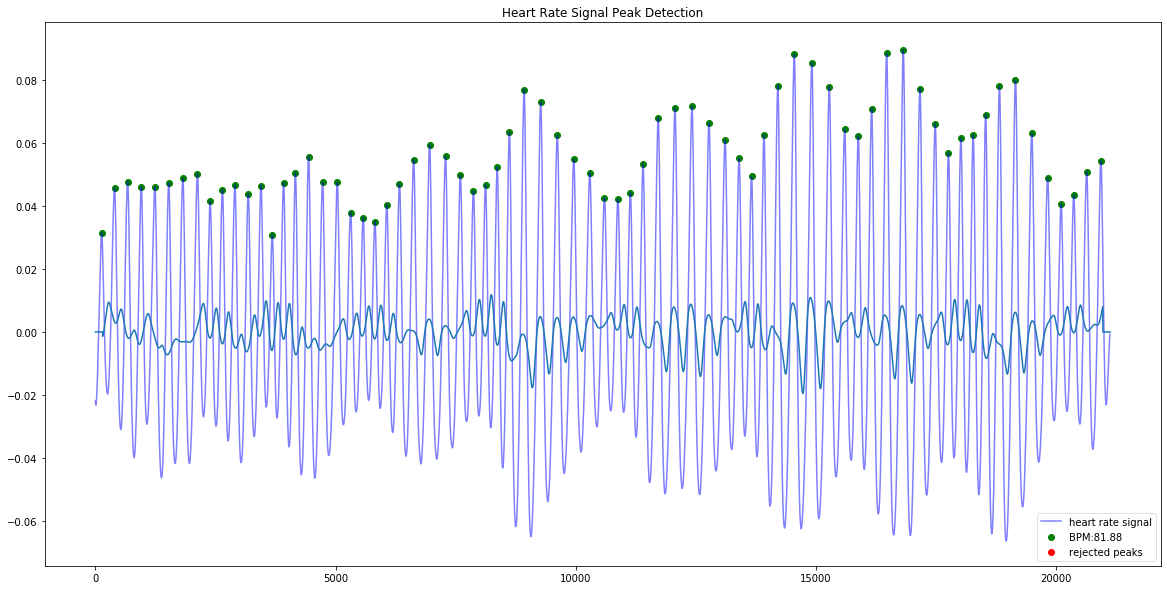

bpm: 81.879775
ibi: 732.781690
sdnn: 88.774312
sdsd: 62.546297
rmssd: 62.554177
pnn20: 0.328571
pnn50: 0.214286
hr_mad: 66.000000
breathingrate: 0.170374
lf: 370.493332
hf: 866.716750
lf/hf: 0.427468


In [10]:
# sliding window analysis
def window(a, w, o, copy = False):
    sh = (a.size - w + 1, w)
    st = a.strides * 2
    o = int(o * w);
    view = np.lib.stride_tricks.as_strided(a, strides = st, shape = sh)[0::o]
    if copy:
        return view.copy()
    else:
        return view
    
ppgs = window(filtered, int(fs)*30, 0.2) # 30 seconds window

for p in ppgs:
    # compute HRV
    wd, m = hp.process(filtered, sample_rate=fs, calc_freq=True, freq_method='fft', high_precision=True, clean_rr=True)

    # plot
    plt.figure(figsize=(20,10))
    hp.plotter(wd, m)

    for measure in m.keys():
        print('%s: %f' %(measure, m[measure]))